# Сортировки и поиски 
### Борунов Семён Сергеевич НММбд-01-22

In [1]:
import random
import numpy as np

### Задача 0

In [2]:
def bubble_sort(arr):
    for i in range(len(arr)):
        for j in range(len(arr)-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [3]:
%%timeit -n10 -r1

a = random.sample(range(1, 99), 13)
bubble_sort(a)

44 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


### Задача 1

Проведите анализ скорости работы всех рассмотренных алгоритмов поиска на массиве, состоящем из 100 случайных значений (значения от 1 до 1000). В качестве искомого возьмите элемент, индекс которого будет 5. 

In [4]:
# np.random.seed(42)

nums = np.random.randint(1, 1000, 100)
nums = bubble_sort(nums)
reacheble = nums[5]

reacheble

39

In [5]:
def LinearSearch(nums, val):
    for i in range(len(nums)):
        if nums[i] == val:
            return i
    return -1

def BinarySearch(nums, val):
    first = 0
    last = len(nums)-1
    index = -1
    while (first <= last) and (index == -1):
        mid = (first+last)//2
        if nums[mid] == val:
            index = mid
        else:
            if val<nums[mid]:
                last = mid -1
            else:
                first = mid +1
    return index

def JumpSearch(nums, val):
    length = len(nums)
    jump = int(length**0.5)
    left, right = 0, 0
    while left < length and nums[left] <= val:
        right = min(length - 1, left + jump)
        if nums[left] <= val and nums[right] >= val:
            break
        left += jump;
    if left >= length or nums[left] > val:
        return -1
    right = min(length - 1, right)
    i = left
    while i <= right and nums[i] <= val:
        if nums[i] == val:
            return i
        i += 1
    return -1

def ExponentialSearch(nums, val):
    if nums[0] == val:
        return 0
    index = 1
    while index < len(nums) and nums[index] <= val:
        prev_index = index
        index = index * 2
    return BinarySearch(nums[:min(index, len(nums))], val)

def InterpolationSearch(nums, val):
    low = 0
    high = (len(nums) - 1)
    while low <= high and val >= nums[low] and val <= nums[high]:
        index = low + int(((float(high - low) / ( nums[high] - nums[low])) * ( val - nums[low])))
        if nums[index] == val:
            return index
        if nums[index] < val:
            low = index + 1;
        else:
            high = index - 1;
    return -1

In [11]:
%%timeit

LinearSearch(nums, reacheble)

1.41 µs ± 199 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [12]:
%%timeit 

BinarySearch(nums, reacheble)

2.35 µs ± 98.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
%%timeit 

JumpSearch(nums, reacheble)

4.74 µs ± 67.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
%%timeit

ExponentialSearch(nums, reacheble)

3.29 µs ± 74.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
%%timeit

InterpolationSearch(nums, reacheble)

17.3 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


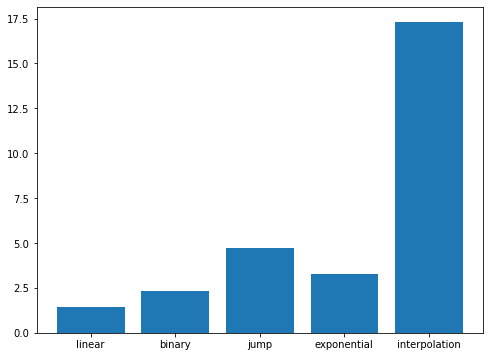

In [19]:
import matplotlib.pyplot as plt

time_dict = {'linear':1.41,
              'binary':2.35,
              'jump':4.74,
              'exponential':3.29,
              'interpolation':17.3}

plt.figure(figsize=(8,6))
plt.bar(time_dict.keys(), time_dict.values())
plt.show()

Если данные отсортированы и мы ищем элемент в начале массива, то линейный поиск показывает лучшие значения.

### Задача 2
Проведите анализ скорости работы всех рассмотренных алгоритмов поиска на массиве, состоящем из 100 случайных значений (значения от 1 до 1000). В качестве искомого возьмите элемент, индекс которого будет 95.

In [20]:
reacheble = nums[95]
reacheble

949

In [21]:
%%timeit

LinearSearch(nums, reacheble)

15.9 µs ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [22]:
%%timeit 

BinarySearch(nums, reacheble)

2.76 µs ± 30.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [23]:
%%timeit 

JumpSearch(nums, reacheble)

8.65 µs ± 20.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [24]:
%%timeit

ExponentialSearch(nums, reacheble)

4.84 µs ± 32.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [25]:
%%timeit

InterpolationSearch(nums, reacheble)

6.82 µs ± 54.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


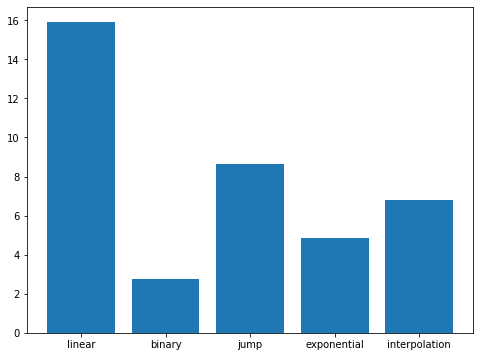

In [26]:
time_dict = {'linear':15.9,
              'binary':2.76,
              'jump':8.65,
              'exponential':4.84,
              'interpolation':6.82}

plt.figure(figsize=(8,6))
plt.bar(time_dict.keys(), time_dict.values())
plt.show()

На том же отсортированном массиве, но при поиске элемента в конце (95). Линейный поиск очень сильно отстает, бинарный поиск к этому делу устойчив, а интерполяцинный поиск намного лучше.

### Задача 3
Сделайте выводы по скорости работы алгоритмов поиска в разных условиях из 1 и 2 задач. Постройте 2 графика сравнения этих скоростей.

In [28]:
import time

Видимо под скоростью работы подразумевается временная сложность алгоритмов, поэтому будем оценивать именно ее

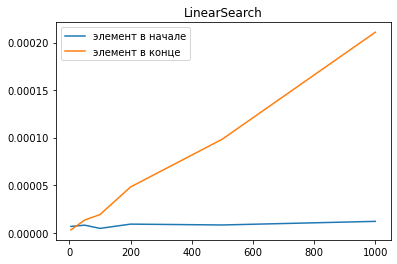

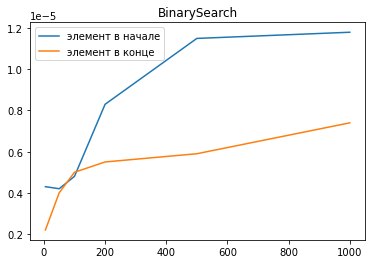

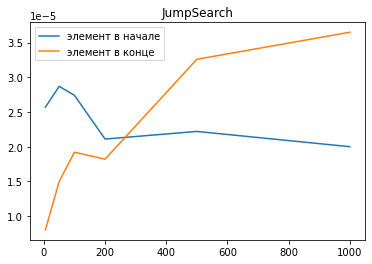

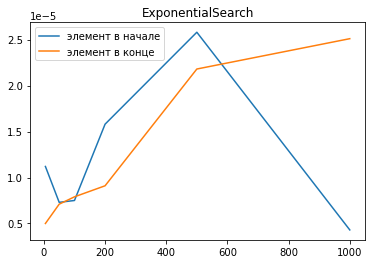

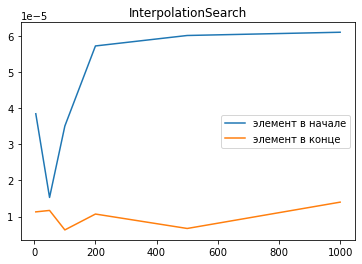

In [65]:
nums = range(101)
times_left = []
times_right = []

names = ['LinearSearch', 'BinarySearch', 'JumpSearch', 'ExponentialSearch', 'InterpolationSearch']
sizes = [5, 50, 100, 200, 500, 1000]
for s_num, search in enumerate([LinearSearch, BinarySearch, JumpSearch, ExponentialSearch, InterpolationSearch]):
    for n in sizes:
        nums = np.random.randint(1, 1000, n)
        nums = bubble_sort(nums)
        
        start_time = time.perf_counter()
        search(nums, nums[2]) # элемент в начале
        end_time = time.perf_counter()
        
        times_left.append(end_time - start_time)
        
        start_time = time.perf_counter()
        search(nums, nums[-2]) # элемент в конце
        end_time = time.perf_counter()
        
        times_right.append(end_time - start_time)
        
    plt.plot(sizes, times_left, )
    plt.plot(sizes, times_right)
    plt.title(names[s_num])
    plt.legend(['элемент в начале', 'элемент в конце'])
    
    plt.show()
    times_left = []
    times_right = []


Видно, что линейный поиск отлично ищет элементы в начале, интереполяционный в конце у экспоненциального на разных $n$ разные резудьтаты 

### Задача 4
Проведите анализ скорости работы всех рассмотренных алгоритмов сортировки на массиве, состоящем из 100 значений (значения массива должны быть последовательными от 1 до 100). 

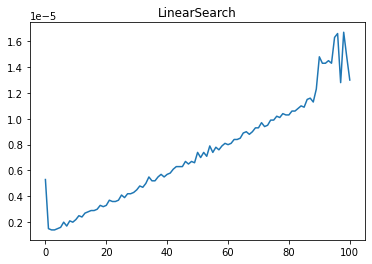

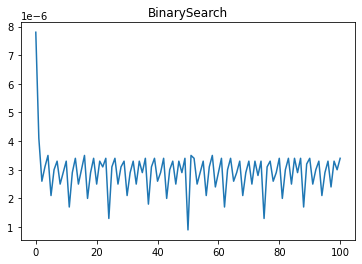

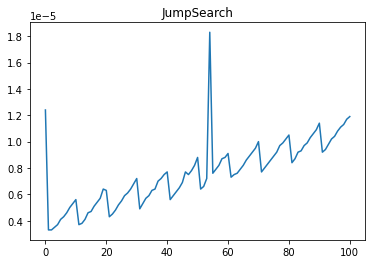

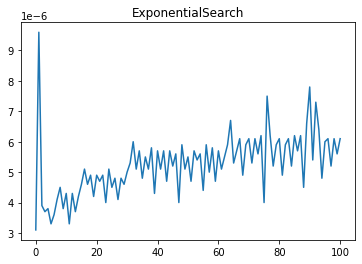

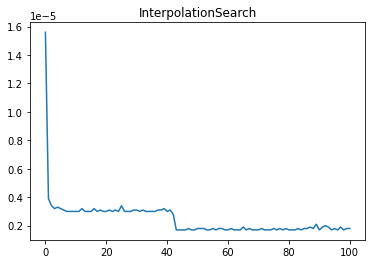

In [57]:
nums = range(101)
times = []
names = ['LinearSearch', 'BinarySearch', 'JumpSearch', 'ExponentialSearch', 'InterpolationSearch']
for s_num, search in enumerate([LinearSearch, BinarySearch, JumpSearch, ExponentialSearch, InterpolationSearch]):
    for r in nums:
        start_time = time.perf_counter()
        search(nums, r)
        end_time = time.perf_counter()
        times.append(end_time - start_time)
    plt.plot(times)
    plt.title(names[s_num])
    plt.show()
    times = []

На графиках представлена зависимость времени выполнения от искомого элеменита (в смысле номера в сортированном списке).  
Теперь очевидно, что линейный поиск справляется тем хуже, чем дальше элемент, бинарынй хорошо ищет по элементам, расположенным в $2^n$ позициях и тд.

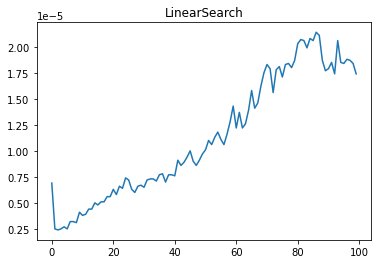

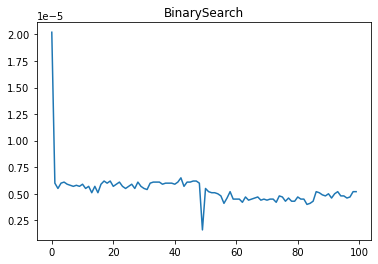

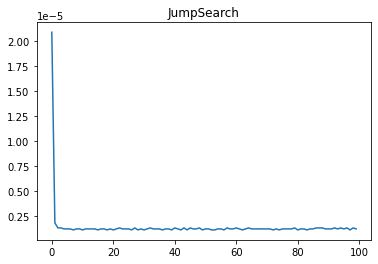

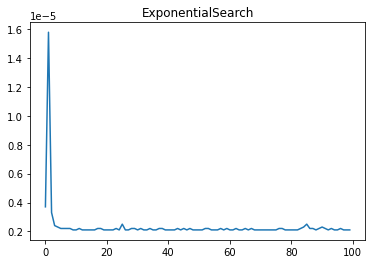

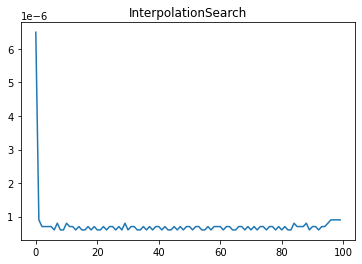

In [58]:
nums = range(100, 0, -1)
times = []
names = ['LinearSearch', 'BinarySearch', 'JumpSearch', 'ExponentialSearch', 'InterpolationSearch']
for s_num, search in enumerate([LinearSearch, BinarySearch, JumpSearch, ExponentialSearch, InterpolationSearch]):
    for r in nums:
        start_time = time.perf_counter()
        search(nums, r)
        end_time = time.perf_counter()
        times.append(end_time - start_time)
    plt.plot(times)
    plt.title(names[s_num])
    plt.show()
    times = []

Все сортировки, кроме линейной, показывают плохие результаты на первых элеметах (те на значении 100), в остальном они ведут себя стабильно плохо, скорее всего последние 4 алгоритма вообще не находят значение, а просматривают весь список и заканичивают с ошибкой 

### Задача 6

Сделайте выводы по скорости работы алгоритмов сортировки в разных условиях из 4 и 5 задач. Постройте 2 графика сравнения этих скоростей.

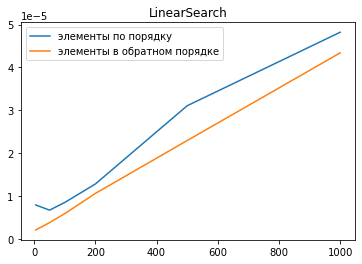

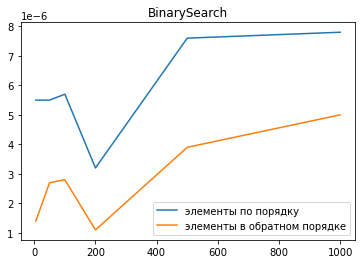

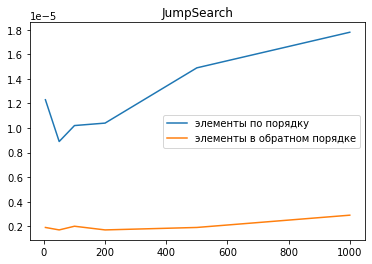

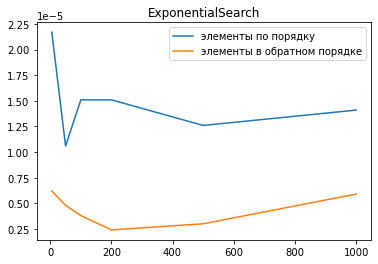

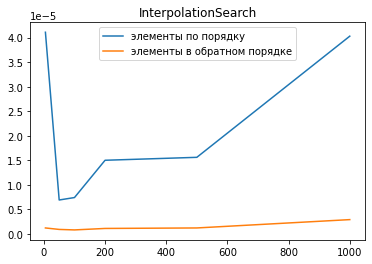

In [67]:
nums = range(101)
times_left = []
times_right = []

names = ['LinearSearch', 'BinarySearch', 'JumpSearch', 'ExponentialSearch', 'InterpolationSearch']
sizes = [5, 50, 100, 200, 500, 1000]
for s_num, search in enumerate([LinearSearch, BinarySearch, JumpSearch, ExponentialSearch, InterpolationSearch]):
    for n in sizes:
        nums = np.random.randint(1, 1000, n)
        nums = sorted(nums)
        
        start_time = time.perf_counter()
        search(nums, nums[n//2]) # элемент в cередине
        end_time = time.perf_counter()
        
        times_left.append(end_time - start_time)
        
        nums = sorted(nums, reverse=True)

        start_time = time.perf_counter()
        search(nums, nums[n//2]) 
        end_time = time.perf_counter()
        
        times_right.append(end_time - start_time)
        
    plt.plot(sizes, times_left, )
    plt.plot(sizes, times_right)
    plt.title(names[s_num])
    plt.legend(['элементы по порядку', 'элементы в обратном порядке'])
    
    plt.show()
    times_left = []
    times_right = []


Линеный поиск кажется устойчивым к порядку элементов,jump отлично ищет в перевернутых списках (скорее всего с результатом "ошибка"), интерполяционный тоже